# Openfoam - Large Motorbike Benchmark

Results from the openfoam CDF code for the semi-official large motorbike benchmark, documented [here](https://openfoamwiki.net/index.php/Benchmarks).

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance. 

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,109.245,110.887
2,52.394,51.829
4,25.879,27.050
8,19.028,19.191
16,19.375,17.849


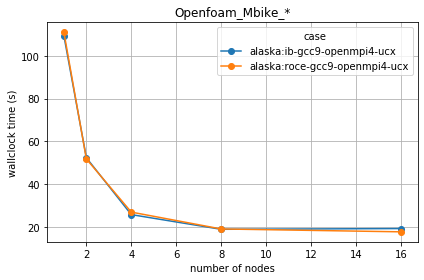

In [2]:
df = modules.utils.tabulate_last_perf('Openfoam_Mbike_*', 'num_nodes', 'runtime_real')
display(HTML(df.to_html()))
ax = df.plot(grid=True, style='o-')
ax.set_xlabel('number of nodes')
ax.set_ylabel('wallclock time (s)')
ax.set_title('Openfoam_Mbike_*')
plt.tight_layout()